In [26]:
import gymnasium as gym
import humanoid_bench
import numpy as np

import matplotlib.pyplot as plt

In [27]:
env = gym.make('h1hand-stand-v0')
print(env.action_space)
print(env.observation_space)

Box(-1.0, 1.0, (61,), float32)
Box(-inf, inf, (151,), float64)


(1540, 61)


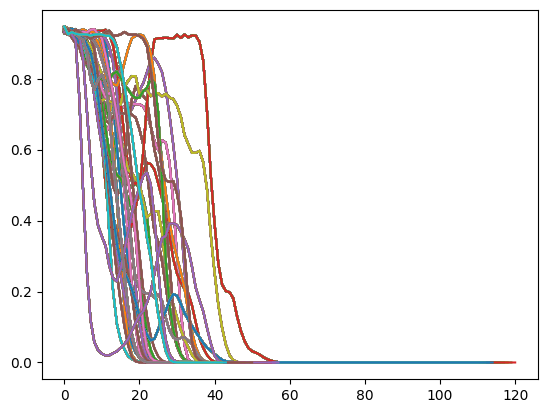

In [46]:
max_step = 3000
inters = 30
OBS = []
ACTIONS = []
REWARDS = []
TIMES = []

for ite in range(inters):
    observation, info = env.reset()
    actions = []
    observations = [observation]
    rewards = []
    times = [0]
    for step in range(1,max_step+1):
        action = env.action_space.sample()
        # action = np.zeros(env.action_space.shape, dtype=np.float32)
        observation, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        if done:
            # print(step)
            break
        actions.append(action)
        observations.append(observation)
        rewards.append(reward)
        times.append(step)
        plt.plot(range(step),rewards)

    ACTIONS.append(actions)
    OBS.append(observations)
    REWARDS.append(np.array(rewards).reshape(-1,1))
    TIMES.append(np.array(times).reshape(-1,1))
ACTIONS_arr =  np.vstack(ACTIONS)
OBS_arr =  np.vstack(OBS)
REWARDS_arr =  np.vstack(REWARDS)
TIMES_arr =  np.vstack(TIMES)
print(ACTIONS_arr.shape)
    